In [ ]:
#created kmeans model

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
product_descriptions = pd.read_csv('product_descriptions.csv')

In [4]:
product_descriptions = product_descriptions.dropna()
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [5]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

In [7]:
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

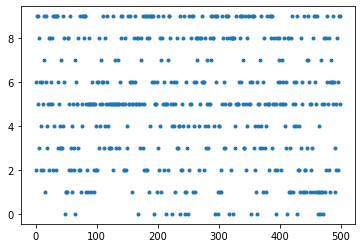

In [8]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [9]:
def print_cluster(i):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind]),
    print

def just_cluster(i):
    return i

In [10]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 power
 light
 air
 watt
 volt
 led
 fan
 control
 plan
 depot
Cluster 1:
 frame
 patio
 fabric
 rust
 collection
 outdoor
 aluminum
 dining
 color
 ft
Cluster 2:
 water
 toilet
 tank
 flush
 cycle
 valve
 temperature
 design
 handle
 heater
Cluster 3:
 proposition
 nbsp
 residents
 california
 65
 door
 painted
 ft
 wood
 moulding
Cluster 4:
 storage
 shelves
 shelf
 lbs
 easy
 adjustable
 vinyl
 brackets
 finish
 durable
Cluster 5:
 cooking
 oven
 porcelain
 easy
 grill
 removable
 burner
 paint
 lid
 away
Cluster 6:
 watering
 plants
 stake
 easy
 rug
 garden
 vary
 head
 water
 sprinkler
Cluster 7:
 metal
 gauge
 steel
 drill
 hole
 screw
 screws
 work
 pre
 use
Cluster 8:
 insulation
 attic
 ladder
 energy
 fiberglass
 film
 radiant
 tape
 easy
 helps
Cluster 9:
 wall
 panels
 ft
 plate
 lbs
 100
 speaker
 use
 tile
 design


In [11]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product]) #put it in numbers
    prediction = model.predict(Y) #using those numbers, we find the nearby cluster
    #print(prediction)
    print_cluster(prediction[0]) 

def show_recommendations2(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product]) #put it in numbers
    prediction = model.predict(Y) #using those numbers, we find the nearby cluster
    #print(prediction)
    return (prediction[0])


In [ ]:
show_recommendations("spray paint")

Cluster 9:
 paint
 easy
 roller
 tool
 ft
 wood
 water
 brush
 tape
 smooth


In [ ]:
#testing the model

In [12]:
Home = pd.read_csv('test.csv',encoding='latin-1')

In [13]:
Home.head(100) #too specific to test for my case

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668
...,...,...,...,...
95,131,100024,Goal Zero Yeti 1250-Watt Solar Generator with ...,panel cart
96,132,100024,Goal Zero Yeti 1250-Watt Solar Generator with ...,solar panel
97,133,100025,Stal wart 220 lbs. Adjustable Telescopic Furni...,furniture dolly
98,134,100026,Nantucket Pavers Patio-on-a-Pallet 10 ft. x 10...,12 x 18 brick pavers


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
Set1 = pd.read_excel('sheet1.xlsx') #tech
Set1['result'] = 'tech'
Set1.head()

,name,url,rating,price,number_rating,image_url,result
0,Fire TV Stick 4K streaming device with Alexa V...,https://www.amazon.com/Fire-TV-Stick-4K-with-A...,4.7 out of 5 stars,49.99,729233.0,https://images-na.ssl-images-amazon.com/images...,tech
1,Fire TV Stick (3rd Gen) with Alexa Voice Remot...,https://www.amazon.com/fire-tv-stick-with-3rd-...,4.7 out of 5 stars,39.99,64054.0,https://images-na.ssl-images-amazon.com/images...,tech
2,"Amazon Smart Plug, Works with Alexa â€“ A Cert...",https://www.amazon.com/Amazon-smart-plug-works...,4.7 out of 5 stars,24.99,447314.0,https://images-na.ssl-images-amazon.com/images...,tech
3,Fire TV Stick Lite with Alexa Voice Remote Lit...,https://www.amazon.com/fire-tv-stick-lite/dp/B...,4.7 out of 5 stars,29.99,195194.0,https://images-na.ssl-images-amazon.com/images...,tech
4,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...,4.7 out of 5 stars,39.99,763471.0,https://images-na.ssl-images-amazon.com/images...,tech


In [16]:
Set2 = pd.read_excel('sheet2.xlsx') #bedroom
Set2['result'] = 'bed'
Set2.head()

,name,url,rating,price,number_rating,image_url,result
0,Beckham Hotel Collection Bed Pillows for Sleep...,https://www.amazon.com/Beckham-Hotel-Collectio...,4.4 out of 5 stars,39.99,143394,https://images-na.ssl-images-amazon.com/images...,bed
1,Bedsure Satin Pillowcase for Hair and Skin Que...,https://www.amazon.com/Bedsure-Satin-Pillowcas...,4.5 out of 5 stars,8.99,202867,https://images-na.ssl-images-amazon.com/images...,bed
2,Queen Size Sheet Set - 4 Piece Set - Hotel Lux...,https://www.amazon.com/Queen-Size-Sheet-Set-Br...,4.6 out of 5 stars,29.99,131227,https://images-na.ssl-images-amazon.com/images...,bed
3,Mellanni Queen Sheet Set - Hotel Luxury 1800 B...,https://www.amazon.com/Mellanni-Bed-Sheet-Set-...,4.5 out of 5 stars,32.97,254382,https://images-na.ssl-images-amazon.com/images...,bed
4,Amazon Basics Lightweight Super Soft Easy Care...,https://www.amazon.com/AmazonBasics-Microfiber...,4.6 out of 5 stars,14.99,282648,https://images-na.ssl-images-amazon.com/images...,bed


In [17]:
Set3 = pd.read_excel('sheet3.xlsx') #kitchen
Set3['result'] = 'kitchen'
Set3.shape
Set3.head()

,name,url,rating,price,number_rating,image_url,result
0,"AGLUCKY Ice Maker Machine for Countertop, Port...",https://www.amazon.com/AGLUCKY-Machine-Counter...,4.5 out of 5 stars,124.99,8511,https://images-na.ssl-images-amazon.com/images...,kitchen
1,"Portable Ice Maker, 26Lbs/24H Self-Cleaning Ic...",https://www.amazon.com/Portable-Ice-Maker-Self...,4.4 out of 5 stars,109.98,175,https://images-na.ssl-images-amazon.com/images...,kitchen
2,Igloo ICEB26BK Portable Electric Countertop 26...,https://www.amazon.com/Igloo-ICEB26BK-Portable...,4.3 out of 5 stars,129.99,8843,https://images-na.ssl-images-amazon.com/images...,kitchen
3,GE Profile Opal | Countertop Nugget Ice Maker ...,https://www.amazon.com/GE-Profile-Countertop-N...,4.5 out of 5 stars,579.00,12996,https://images-na.ssl-images-amazon.com/images...,kitchen
4,Koolatron KTCF155 Compact Chest 5.0 Cubic Feet...,https://www.amazon.com/Koolatron-KTCF155-Chest...,4.5 out of 5 stars,210.00,2977,https://images-na.ssl-images-amazon.com/images...,kitchen


In [18]:
Set4 = pd.read_excel('sheet4.xlsx') #clothes
Set4['result'] = 'clothes'
Set4.head()

,name,url,rating,price,number_rating,image_url,result
0,Crocs Unisex-Adult Men's and Women's Classic Clog,https://www.amazon.com/Crocs-Unisex-Classic-Cl...,4.8 out of 5 stars,99.00,240166,https://images-na.ssl-images-amazon.com/images...,clothes
1,Amoretu Women Summer Tunic Dress V Neck Casual...,https://www.amazon.com/Amoretu-Womens-Loose-Pl...,3.9 out of 5 stars,29.98,35635,https://images-na.ssl-images-amazon.com/images...,clothes
2,Hanes Men's EcoSmart Sweatshirt,https://www.amazon.com/Hanes-EcoSmart-Fleece-S...,4.6 out of 5 stars,30.17,103045,https://images-na.ssl-images-amazon.com/images...,clothes
3,"Gildan Men's Crew T-Shirts, Multipack",https://www.amazon.com/Gildan-Mens-T-Shirt-Ass...,4.6 out of 5 stars,52.00,159684,https://images-na.ssl-images-amazon.com/images...,clothes
4,Fruit of the Loom Men's Coolzone Boxer Briefs,https://www.amazon.com/Fruit-Loom-Coolzone-Bri...,4.7 out of 5 stars,425.00,110172,https://images-na.ssl-images-amazon.com/images...,clothes


In [19]:
Set5 = pd.read_excel('sheet5.xlsx') #legos
Set5['result'] = 'legos'
Set5.head()

,name,url,rating,price,rating_number,image_url,result
0,LEGO Marvel Infinity Gauntlet 76191 Collectibl...,https://www.amazon.com/LEGO-Infinity-Gauntlet-...,4.9 out of 5 stars,69.95,612,https://images-na.ssl-images-amazon.com/images...,legos
1,LEGO Super Mario Adventures with Luigi Starter...,https://www.amazon.com/LEGO-Adventures-Buildin...,4.8 out of 5 stars,59.95,861,https://images-na.ssl-images-amazon.com/images...,legos
2,LEGO Friends Forest House 41679 Building Kit; ...,https://www.amazon.com/LEGO-Friends-Forest-Bui...,4.8 out of 5 stars,29.97,85,https://images-na.ssl-images-amazon.com/images...,legos
3,LEGO Speed Champions Chevrolet Corvette C8.R R...,https://www.amazon.com/LEGO-Champions-Chevrole...,4.8 out of 5 stars,29.95,141,https://images-na.ssl-images-amazon.com/images...,legos
4,"LEGO Disney Ariel, Belle, Cinderella and Tiana...",https://www.amazon.com/LEGO-Cinderella-Storybo...,4.6 out of 5 stars,24.97,59,https://images-na.ssl-images-amazon.com/images...,legos


In [20]:
Set6 = pd.read_excel('sheet6.xlsx') #tech
Set6['result'] = 'tech'
Set6.shape


(50, 7)

In [21]:
testingset = pd.concat([Set1, Set2, Set3, Set4, Set5])

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(testingset, test_size=0.33) #traning and test split 1

In [23]:
train2, test2 = train_test_split(testingset, test_size=0.33) #training and test split 2

In [24]:
trainingset = train[train['name'].notna()] #move out null values
trainingset.head()

,name,url,rating,price,number_rating,image_url,result,rating_number
18,LEGO Star Wars The Bad Batch Attack Shuttle 75...,https://www.amazon.com/LEGO-Shuttle-75314-Awes...,4.7 out of 5 stars,99.95,NaN,https://images-na.ssl-images-amazon.com/images...,legos,175.0
13,Giantex Portable Mini Compact Twin Tub Washing...,https://www.amazon.com/Giantex-Portable-Compac...,4.3 out of 5 stars,189.99,10156.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN
14,LEGO Marvel Iron Man: Iron Monger Mayhem 76190...,https://www.amazon.com/LEGO-Marvel-Iron-Man-Co...,4.7 out of 5 stars,39.97,NaN,https://images-na.ssl-images-amazon.com/images...,legos,87.0
8,LEGO Speed Champions McLaren Elva 76902 Buildi...,https://www.amazon.com/LEGO-Champions-McLaren-...,4.9 out of 5 stars,19.95,NaN,https://images-na.ssl-images-amazon.com/images...,legos,43.0
22,BELONGSCI Women's Dress Sweet & Cute V-Neck Be...,https://www.amazon.com/BELONGSCI-Womens-Dress-...,3.8 out of 5 stars,35.99,31301.0,https://images-na.ssl-images-amazon.com/images...,clothes,NaN


In [25]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(trainingset['name'])
X1

<167x853 sparse matrix of type '<class 'numpy.float64'>'
	with 1552 stored elements in Compressed Sparse Row format>

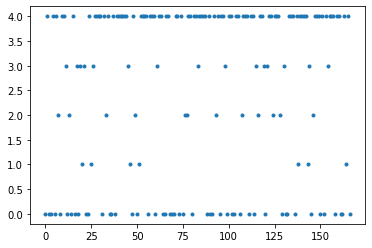

In [26]:
X=X1

kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [27]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [28]:
true_k = 5

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

#if clusters are 5, the tech clusters combine into one, thats good. We can intuitively tell its working.
#However, we still have to prove it numerically.

Top terms per cluster:
Cluster 0:
 men
 women
 portable
 shirt
 compact
 hanes
 pack
 amazon
 ring
 cotton
Cluster 1:
 alexa
 tv
 gen
 smart
 echo
 stick
 voice
 remote
 display
 hd
Cluster 2:
 lego
 building
 kit
 toy
 friends
 mario
 collectible
 super
 wars
 star
Cluster 3:
 queen
 set
 sheets
 bed
 size
 sheet
 hotel
 grey
 bedsure
 luxury
Cluster 4:
 ice
 maker
 countertop
 machine
 cleaning
 self
 24h
 portable
 function
 26lbs


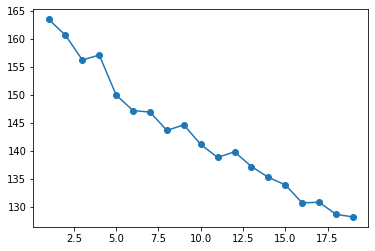

In [29]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(X1)
    SSE.append(kmeans.inertia_)

x = range(1,20)
plt.plot(x, SSE, marker='o')

In [30]:
for i in range(true_k):
    print_cluster(i)

Cluster 0:
 men
 women
 portable
 shirt
 compact
 hanes
 pack
 amazon
 ring
 cotton
Cluster 1:
 alexa
 tv
 gen
 smart
 echo
 stick
 voice
 remote
 display
 hd
Cluster 2:
 lego
 building
 kit
 toy
 friends
 mario
 collectible
 super
 wars
 star
Cluster 3:
 queen
 set
 sheets
 bed
 size
 sheet
 hotel
 grey
 bedsure
 luxury
Cluster 4:
 ice
 maker
 countertop
 machine
 cleaning
 self
 24h
 portable
 function
 26lbs


In [31]:
testset = test[test['name'].notna()]
testset


,name,url,rating,price,number_rating,image_url,result,rating_number
28,Ring Chime,https://www.amazon.com/Ring-Chime/dp/B07WML1QM...,4.6 out of 5 stars,29.99,45622.0,https://images-na.ssl-images-amazon.com/images...,tech,NaN
23,"All-new Fire HD 10 tablet, 10.1"", 1080p Full H...",https://www.amazon.com/Fire-HD-10-tablet/dp/B0...,4.6 out of 5 stars,149.99,25645.0,https://images-na.ssl-images-amazon.com/images...,tech,NaN
29,LEGO NINJAGO Legacy Fire Dragon Attack 71753 N...,https://www.amazon.com/LEGO-NINJAGO-Playset-Bu...,5.0 out of 5 stars,49.95,NaN,https://images-na.ssl-images-amazon.com/images...,legos,54.0
31,SeaKlear AquaPill AP71 WinterPill Swimming Poo...,https://www.amazon.com/SeaKlear-AquaPill-AP71-...,4.4 out of 5 stars,15.49,6740.0,https://images-na.ssl-images-amazon.com/images...,bed,NaN
49,Germ Guardian FLT4825 HEPA GENUINE Air Purifie...,https://www.amazon.com/GermGuardian-FLT4825-Re...,4.8 out of 5 stars,24.99,27086.0,https://images-na.ssl-images-amazon.com/images...,bed,NaN
...,...,...,...,...,...,...,...,...
27,"COMFEEâ€™ 1.6 Cu.ft Portable Washing Machine, ...",https://www.amazon.com/COMFEE-Portable-Capacit...,4.5 out of 5 stars,301.65,1947.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN
9,Introducing Fire TV Stick 4K Max streaming dev...,https://www.amazon.com/fire-tv-stick-4k-max-wi...,NaN,54.99,NaN,https://images-na.ssl-images-amazon.com/images...,tech,NaN
37,Simple Joys by Carter's Baby 5-Pack Long-Sleev...,https://www.amazon.com/Simple-Joys-Carters-Lon...,4.8 out of 5 stars,24.94,41948.0,https://images-na.ssl-images-amazon.com/images...,clothes,NaN
37,"COMFEE' Portable Washing Machine, 0.9 cu.ft Co...",https://www.amazon.com/COMFEE-CLV09N1AMG-Porta...,4.4 out of 5 stars,249.00,1571.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN


In [34]:
predictions = []
for i in testset['name']:
  predicted = show_recommendations2(i)
  predictions.append(predicted)


In [33]:
# count1 = 0
# for i in predictions:
  # if i == 3:
    # predictions[count1] = 1
    
  # count1 = count1 + 1



In [35]:
testset['predictions'] = list(predictions)


In [36]:
testset

,name,url,rating,price,number_rating,image_url,result,rating_number,predictions
28,Ring Chime,https://www.amazon.com/Ring-Chime/dp/B07WML1QM...,4.6 out of 5 stars,29.99,45622.0,https://images-na.ssl-images-amazon.com/images...,tech,NaN,0
23,"All-new Fire HD 10 tablet, 10.1"", 1080p Full H...",https://www.amazon.com/Fire-HD-10-tablet/dp/B0...,4.6 out of 5 stars,149.99,25645.0,https://images-na.ssl-images-amazon.com/images...,tech,NaN,0
29,LEGO NINJAGO Legacy Fire Dragon Attack 71753 N...,https://www.amazon.com/LEGO-NINJAGO-Playset-Bu...,5.0 out of 5 stars,49.95,NaN,https://images-na.ssl-images-amazon.com/images...,legos,54.0,2
31,SeaKlear AquaPill AP71 WinterPill Swimming Poo...,https://www.amazon.com/SeaKlear-AquaPill-AP71-...,4.4 out of 5 stars,15.49,6740.0,https://images-na.ssl-images-amazon.com/images...,bed,NaN,0
49,Germ Guardian FLT4825 HEPA GENUINE Air Purifie...,https://www.amazon.com/GermGuardian-FLT4825-Re...,4.8 out of 5 stars,24.99,27086.0,https://images-na.ssl-images-amazon.com/images...,bed,NaN,0
...,...,...,...,...,...,...,...,...,...
27,"COMFEEâ€™ 1.6 Cu.ft Portable Washing Machine, ...",https://www.amazon.com/COMFEE-Portable-Capacit...,4.5 out of 5 stars,301.65,1947.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN,0
9,Introducing Fire TV Stick 4K Max streaming dev...,https://www.amazon.com/fire-tv-stick-4k-max-wi...,NaN,54.99,NaN,https://images-na.ssl-images-amazon.com/images...,tech,NaN,1
37,Simple Joys by Carter's Baby 5-Pack Long-Sleev...,https://www.amazon.com/Simple-Joys-Carters-Lon...,4.8 out of 5 stars,24.94,41948.0,https://images-na.ssl-images-amazon.com/images...,clothes,NaN,0
37,"COMFEE' Portable Washing Machine, 0.9 cu.ft Co...",https://www.amazon.com/COMFEE-CLV09N1AMG-Porta...,4.4 out of 5 stars,249.00,1571.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN,0


In [37]:
actual = []

for i in testset['result']:
  if i == "tech":
    actual.append(1)
  if i == 'legos':
    actual.append(2)
  if i == 'clothes':
    actual.append(0)
  if i == 'kitchen':
    actual.append(4)
  if i == 'bed':
    actual.append(3)

testset['actual'] = actual 


In [38]:
testset

,name,url,rating,price,number_rating,image_url,result,rating_number,predictions,actual
28,Ring Chime,https://www.amazon.com/Ring-Chime/dp/B07WML1QM...,4.6 out of 5 stars,29.99,45622.0,https://images-na.ssl-images-amazon.com/images...,tech,NaN,0,1
23,"All-new Fire HD 10 tablet, 10.1"", 1080p Full H...",https://www.amazon.com/Fire-HD-10-tablet/dp/B0...,4.6 out of 5 stars,149.99,25645.0,https://images-na.ssl-images-amazon.com/images...,tech,NaN,0,1
29,LEGO NINJAGO Legacy Fire Dragon Attack 71753 N...,https://www.amazon.com/LEGO-NINJAGO-Playset-Bu...,5.0 out of 5 stars,49.95,NaN,https://images-na.ssl-images-amazon.com/images...,legos,54.0,2,2
31,SeaKlear AquaPill AP71 WinterPill Swimming Poo...,https://www.amazon.com/SeaKlear-AquaPill-AP71-...,4.4 out of 5 stars,15.49,6740.0,https://images-na.ssl-images-amazon.com/images...,bed,NaN,0,3
49,Germ Guardian FLT4825 HEPA GENUINE Air Purifie...,https://www.amazon.com/GermGuardian-FLT4825-Re...,4.8 out of 5 stars,24.99,27086.0,https://images-na.ssl-images-amazon.com/images...,bed,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...
27,"COMFEEâ€™ 1.6 Cu.ft Portable Washing Machine, ...",https://www.amazon.com/COMFEE-Portable-Capacit...,4.5 out of 5 stars,301.65,1947.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN,0,4
9,Introducing Fire TV Stick 4K Max streaming dev...,https://www.amazon.com/fire-tv-stick-4k-max-wi...,NaN,54.99,NaN,https://images-na.ssl-images-amazon.com/images...,tech,NaN,1,1
37,Simple Joys by Carter's Baby 5-Pack Long-Sleev...,https://www.amazon.com/Simple-Joys-Carters-Lon...,4.8 out of 5 stars,24.94,41948.0,https://images-na.ssl-images-amazon.com/images...,clothes,NaN,0,0
37,"COMFEE' Portable Washing Machine, 0.9 cu.ft Co...",https://www.amazon.com/COMFEE-CLV09N1AMG-Porta...,4.4 out of 5 stars,249.00,1571.0,https://images-na.ssl-images-amazon.com/images...,kitchen,NaN,0,4


In [40]:
print(classification_report(testset.actual, testset.predictions))

              precision    recall  f1-score   support

           0       0.30      1.00      0.47        17
           1       1.00      0.43      0.61        23
           2       1.00      1.00      1.00        10
           3       1.00      0.12      0.21        17
           4       1.00      0.31      0.48        16

    accuracy                           0.53        83
   macro avg       0.86      0.57      0.55        83
weighted avg       0.86      0.53      0.52        83



In [ ]:
# current accuracy is 50% but keep in mind that there are only five data sets and the technology dataset is not independent to kitchen and bedroom dataset, so the accuracy is lower than it should be.